In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


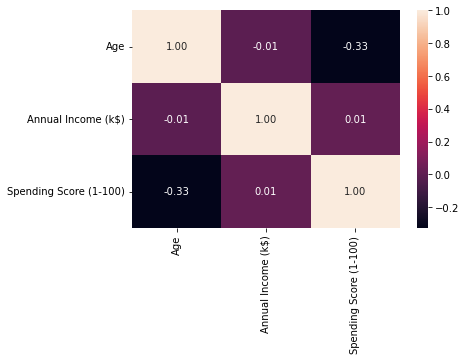

In [6]:
sns.heatmap(data.iloc[:,2:].corr(),annot=True,fmt=".2f")
plt.show()

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


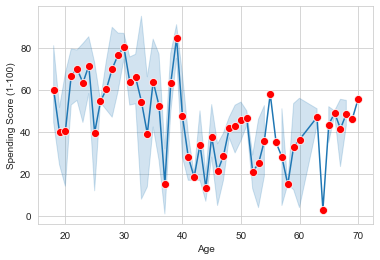

In [7]:
sns.set_style("whitegrid")
sns.lineplot(data.Age,data["Spending Score (1-100)"],marker="o",markerfacecolor="r",markersize=8)
plt.show()

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


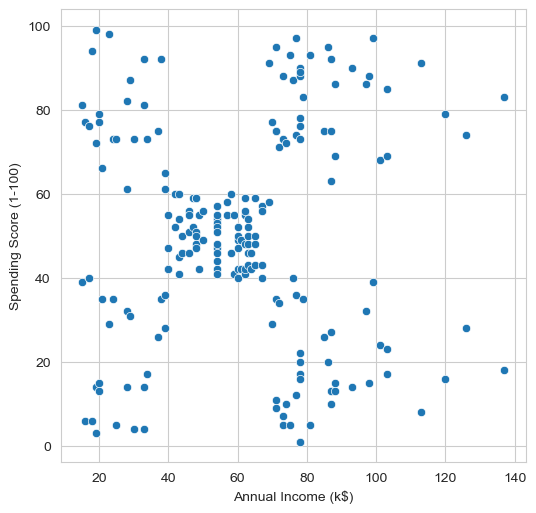

In [11]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.show()

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dptos\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


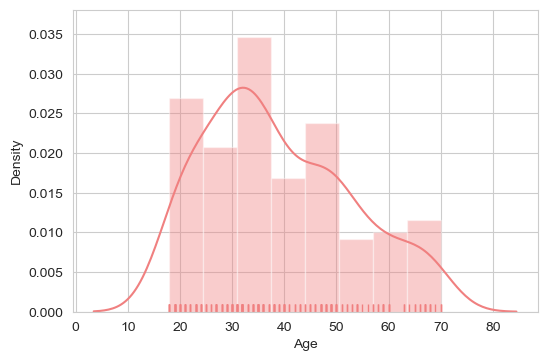

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dptos\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


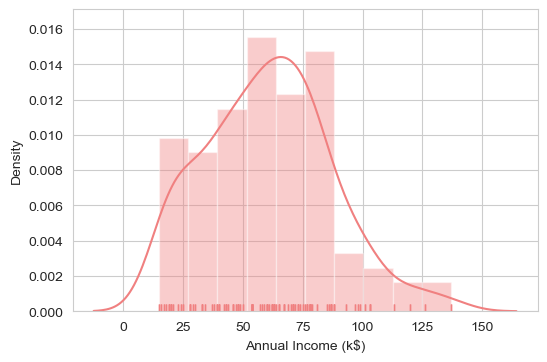

C:\Users\dptos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dptos\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


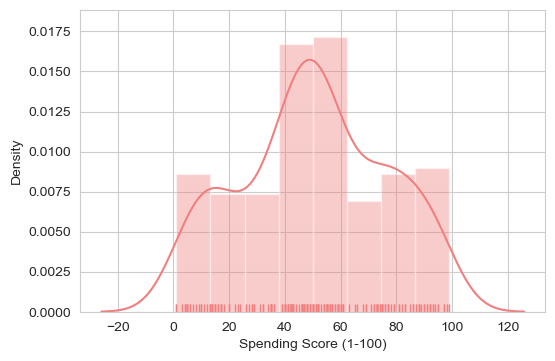

In [14]:
def distributionPlot(columnName):
    if not columnName == "Gender" and not columnName == "CustomerID":
        plt.figure(dpi=100)
        sns.distplot(data[columnName],color="lightcoral",rug=True)
        plt.show()
for column in data.columns:
    distributionPlot(column)

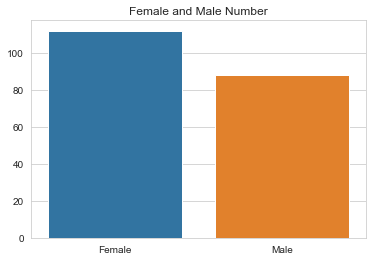

In [15]:
gender = data["Gender"].value_counts()
sns.barplot(x = gender.index, y = gender.values)
plt.title("Female and Male Number")
plt.show()

C:\Users\dptos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


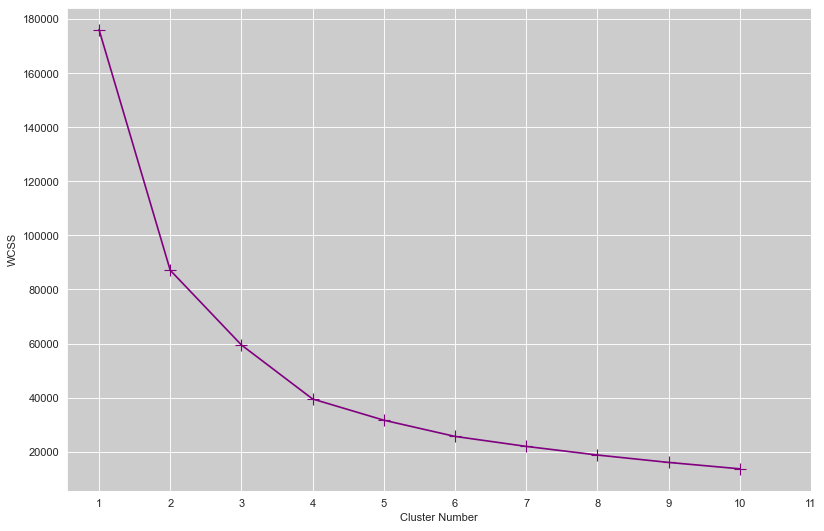

In [18]:
import numpy as np
from sklearn.cluster import KMeans 
X = data.iloc[:,2:4].values
y = data.iloc[:,-1:].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
sns.set_style("darkgrid",{"axes.facecolor":".8"})
plt.figure(figsize=(12,8),dpi=80)
plt.plot(range(1,11),wcss,color="purple",marker="+",markersize=10)
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1,12,1))
plt.ylabel("WCSS")
plt.show()

In [20]:
k_means = KMeans(n_clusters = 4,init = "k-means++")
y_pred = k_means.fit_predict(X)
data["cluster"] = y_pred
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


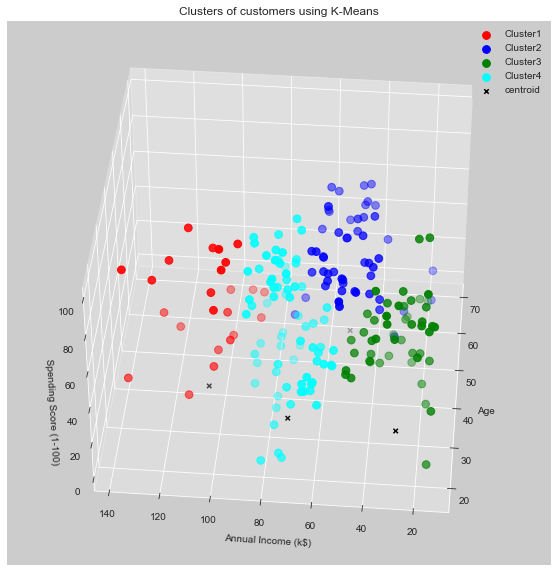

In [23]:
from mpl_toolkits.mplot3d import Axes3D
def clusterVisualiser(data,xlabel,ylabel,zlabel,cluster,model_type):
    color= ['red', 'blue', 'green', 'cyan', 'magenta','purple']
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(cluster):
        ax.scatter(data.Age[data.cluster == i], data[ylabel][data.cluster == i], data[zlabel][data.cluster == i], c=color[i], s=60,label="Cluster"+str(i+1))
    ax.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color="black",marker="x",label="centroid")
    ax.view_init(40, 185)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title('Clusters of customers using '+model_type)
    plt.legend()
    plt.show()

clusterVisualiser(data,"Age","Annual Income (k$)","Spending Score (1-100)",4,"K-Means")